# Deep Learning

<font color="blue"> Bonaventure Raj </font>

# I. Overview

In this project I seek to test different deep neural network models with a dataset found on UCI Irvine Machine Learning Respository. The dataset uses different attributes to predict the evaluation of a car at selling time. This classification based dataset has multiple forms of data, all of which are plain/text classifications. I intend to describe the state of data, convert the data into working forms of train/test validation sets, and then pass it into the model. Finally I will evaluate the accuracy of the model based on certain neural network structures.

# II. Data

In [1]:
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
!cat car.names

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was 

<h6> Data </h6>

> From reading the documentation for the data we see the different attributes that the data has and the corresponding values. We see that there are [buying, maint, doors, persons, lug_boots, safety] for the predictor variables and [evaluation] as the target. Below I encompass the data within a dataframe and plot the values for some visualization of trends.

In [3]:
data = [line.replace("\n", "").split(",") for line in open('car.data').readlines()]

In [4]:
df = pd.DataFrame(data, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','evaluation'])
df

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


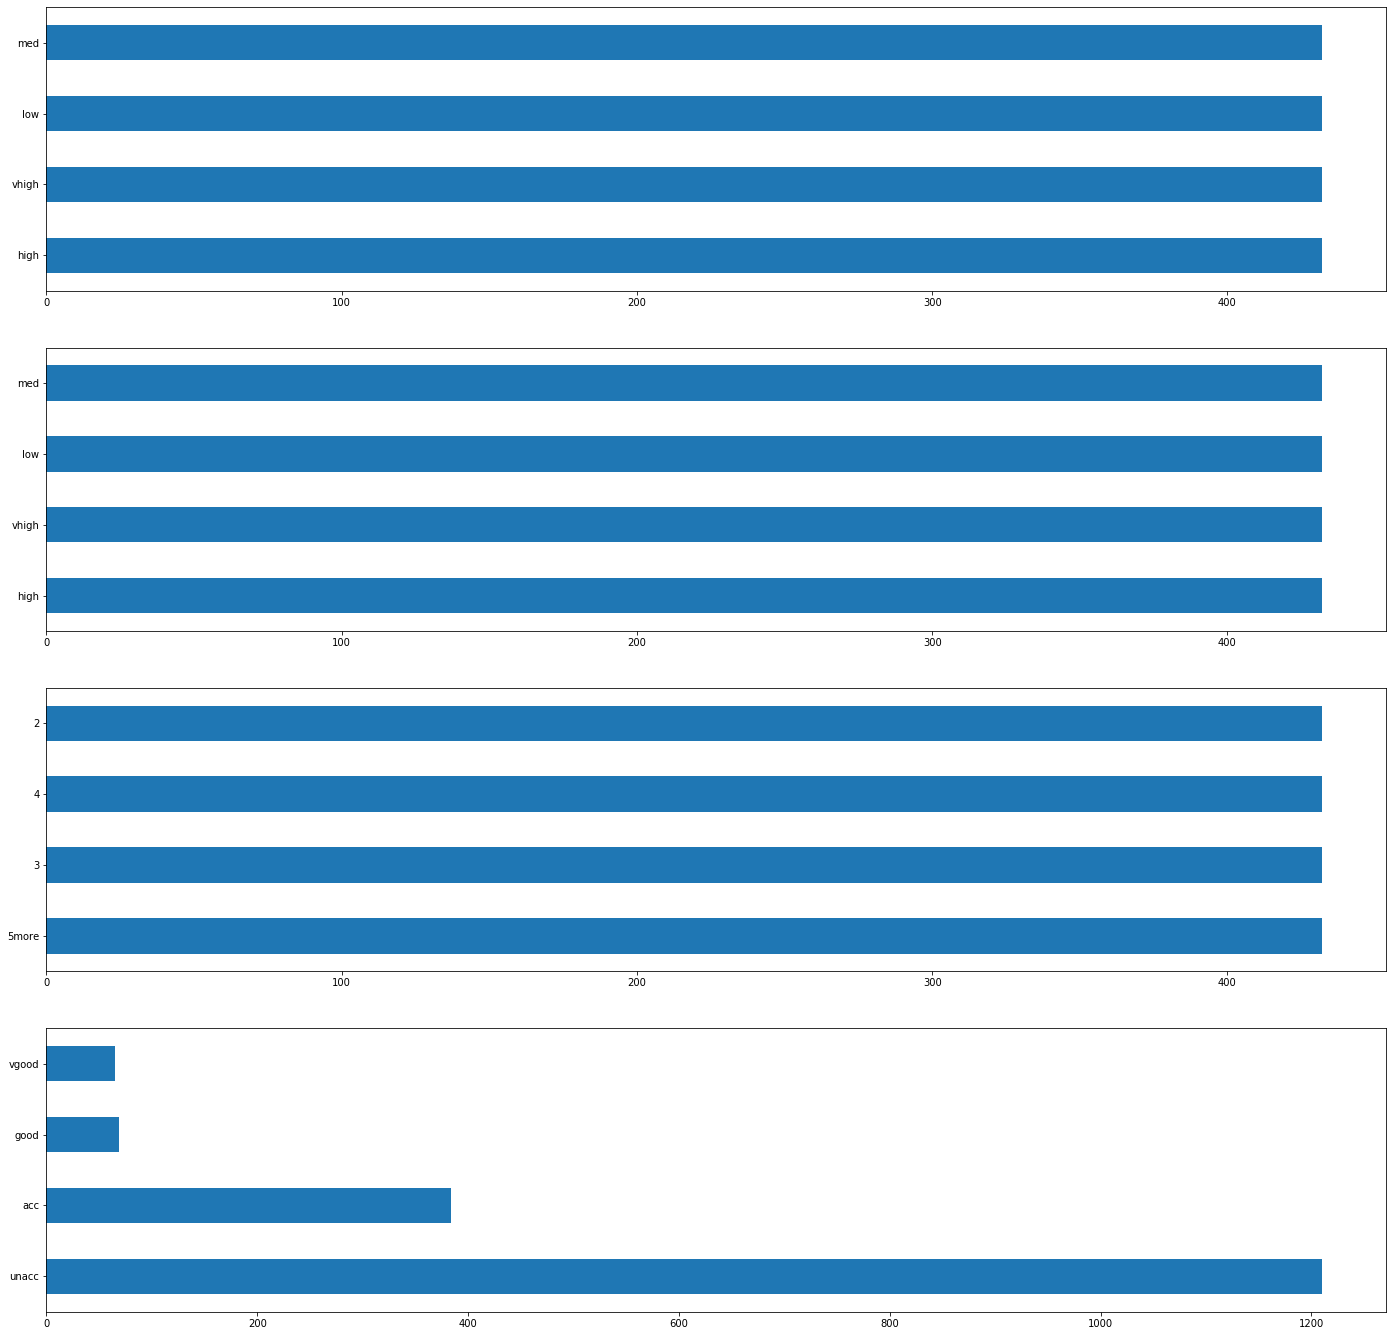

In [5]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(24,24))
df['buying'].value_counts().plot(kind='barh', ax=ax1)
df['maint'].value_counts().plot(kind='barh', ax=ax2)
df['doors'].value_counts().plot(kind='barh', ax=ax3)
df['evaluation'].value_counts().plot(kind='barh', ax=ax4)

<h6> Graphs explanation </h6>

> Above is plotted 4 of the 6 attributes in the dataset. The bar graphs clearly represent an equality within almost all attributes but differences within the target attribute `evaluation`.

In [6]:
for col in df.columns:
    print(col, df[col].unique())

buying ['vhigh' 'high' 'med' 'low']
maint ['vhigh' 'high' 'med' 'low']
doors ['2' '3' '4' '5more']
persons ['2' '4' 'more']
lug_boot ['small' 'med' 'big']
safety ['low' 'med' 'high']
evaluation ['unacc' 'acc' 'vgood' 'good']


In [7]:
d = []
conv_buying = {'low' : 0, 'med' : 1, 'high' : 2, 'vhigh' : 3}
conv_maint = {'low' : 0, 'med' : 1, 'high' : 2, 'vhigh' : 3}
conv_doors = {'2' : 2, '3' : 3, '4' : 4, '5more' : 5}
conv_persons = {'2':2, '4':4, 'more' : 5}
conv_lug_boot={'small' : 0, 'med' : 1, 'big' : 3}
conv_safety = {'low' : 0, 'med':1 , 'high':2}
conv_evaluation={'unacc' : 0, 'acc' : 1, 'vgood': 1, 'good' : 2}

df = df.replace(({"buying":conv_buying, "maint":conv_maint, "doors":conv_doors, "persons":conv_persons, "lug_boot":conv_lug_boot, "safety":conv_safety, "evaluation":conv_evaluation}))

<h6> Mapping the target set back to get predictions </h6>

> We have mapped all the attributes to certain values as well as the targets. However, when we make a prediction we want to be able to get the actual evaluation. We want to make a converter to convert the values back.

In [8]:
conv_back = {v:k for k,v in conv_evaluation.items()}
conv_back

{0: 'unacc', 1: 'vgood', 2: 'good'}

In [9]:
for col in df.columns:
    print(col, df[col].unique())
n = df.shape[0]

buying [3 2 1 0]
maint [3 2 1 0]
doors [2 3 4 5]
persons [2 4 5]
lug_boot [0 1 3]
safety [0 1 2]
evaluation [0 1 2]


<h6> Splitting the data </h6>

> Now that we have converted the dataset into values which can be interpreted, we can work with partitioning the data into training and testing sets.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X, y = df.iloc[:, :-1].values , df.iloc[:, -1].values.reshape(n, 1)
X.shape, y.shape

((1728, 6), (1728, 1))

In [12]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
print('{} is shape: {}'.format('X_train', X_train.shape))
print('{} is shape: {}'.format('y_train', y_train.shape))
print('{} is shape: {}'.format('X_test', X_test.shape))
print('{} is shape: {}'.format('y_test', y_test.shape))

X_train is shape: (1382, 6)
y_train is shape: (1382, 1)
X_test is shape: (346, 6)
y_test is shape: (346, 1)


In [102]:
Ntrain, Ntest = X_train.shape[0], X_test.shape[0] 
n_attrib = X_train.shape[1]
labels = len(conv_back)

In [103]:
Ntrain, Ntest, labels

(1382, 346, 3)

In [16]:
comparisons = []

# Model Structures

Brief Explanations & Introductions 

<h3> Non-Linear Activation Functions </h3>

An activation function is used to determine the output (usually by ranges) of preceptrons within hidden layers in a Neural Network. It acts as a Transfer Function depicting whether the neuron should activate or not. 

<h6> Sigmoid </h6>

Sigmoid curve looks like an S using the formula:<br><br> $$ f(x) = \frac{1}{1+e^{-x}} $$ <br> the graph of which creates an output between the range of 0 and 1. The range of 0 and 1 maps directly as a probability distribution for selection of the pass through. When backpropogation occurs and loss is calculated {see loss section below}, sigmoid causes a major problem. The log loss faces the problem of over-saturation and the potential to kill the gradient. This is due to the multiplication between low local gradients produced from negative probability mappings to very low probabilities. This leads to the vanishing gradient problem which may keep the network from learning. ReLU seeks to address the vanishing gradient problem. Additionally, another problem that this faces is that the output of this function is not zero-centered.TanH addresses this the non-zero centered mean issue.

<h6> Tan(h) or hyperbolic tangent </h6>

Tanh is similar to logistic sigmoid but maps the range between -1 and 1 for all $\mathbb{R}$. <br><br>
$$ f(y) = \tan(h) $$ <br> However, due to the ranges being -1 to 1- the output is zero centered. Unfortunately, tanh struggles with the vanishing gradient problem similar to the Sigmoid function.

<h6> ReLu or Rectified Linear Unit</h6>

ReLu tackles the notorious vanishing gradient problem but avoiding negative outputs by simply finding the max between <br><br> $$f(x) = max(0, x)$$. <br> The range of outputs produced via ReLu are from $[0 - inf)$ which means the activation function can potentially be a very large number. ReLu also makes the network a lot lighter due to less activations between layers - sparse activation. However, it is important to note that ReLu only solves the problem of saturation through the positive region. As mentioned above, large gradient flows can cause the weights to update in ushc a way that the neuron will never activate on any datapoint again. This also takes into consideration what the learning rate is- can be solved with this. Additionally, can be solved with Leaky ReLu.

<h6> Leaky ReLu </h6>

Leaky ReLu attempts to solve the problem of dying ReLu. Instead of making the ReLU activation be a choice between (0 and max number) it adds a small negative slope when x < 0. <br><br> $$ f(x) = 1(x<0)(\alpha x) + 1 (x >= 0)(x) $$ <br> This is not always consistent. Each slope in negative regions can also be made into a parameter of each Neuron introduced in Delving Deep into Rectifiers by Kaiming He et al.,2015. May not always work.

<h6> Maxout </h6>

Generalizes ReLU and its leaky version. Maxout computes the function <br><br> $$ max(w{^T}{_x} + b{_1}, w{^T}{_x} + b{_1})$$ <br>
The maxout neuron has all the benefits of ReLU unit (no saturation and linear operation time) and does not have the dying ReLU problem. However, it doubles its parameters for every neuron leading increased numbers of parameters.

<h6> Softmax </h6>

Softmax calculates similarily to sigmoid function in that it is a probability ranging from 0 to 1. However, each output in a classification based set of outputs will be represented instead of a mapping. This means that each possible output will have a probability assigned to the prediction the Machine Learning model makes.

<h3> Number of Layers </h3>

Determining the number of hidden units and number of layers are a difficult task that compares from systematically testing with certain model requirements. Usually having a larger number of hidden units/layers allows to predict more complex dependencies within the dataset. On the other hand, too many may lead to overfitting the problem for that specific dataset.

<h3> Loss Function </h3>

Deep Learning Models use backpropogation as a means to optomize or lessen the errors/loss that is derived from the weights utilized in that iterative forward pass. This cost or loss function is an important feature that allows the model to learn better decisions and find local minimums in prediction errors. Below are listed the types of loss functions for the corresponding domain it optimizes. For the purposes of this dataset, I will be only explaining Multi-Class Classification Loss Functions because that is how this dataset is represented.  

<h6> Regression Loss Functions </h6>

<li>Mean Squared Error Loss</li>
<li>Mean Squared Logarithmic Error Loss</li>
<li>Mean Absolute Error Loss</li>

<h6> Binary Classification Loss Functions </h6>

<li>Binary Cross-Entropy</li>
<li>Hinge Loss</li>
<li>Squared Hinge Loss</li>

<h6> Multi-Class Classification Loss Functions </h6>

<li>Categorical Cross Entropy Loss</li>

Used with the softmax function, quantifying the distance between the output label and the original label from a probability distribution.<br><br> $$H(y,p) = - \sum \limits_{i} y_ilog(p_i)$$

<li>Sparse Categorical Cross-Entropy Loss</li>

Used with many labels to predictions, acts similarly to categorical cross entropy loss. The only difference between categorical cross entropy and its sparse counterpart is the format of true labels.

<li>Kullback Leibler Divergence Loss</li>

Similar to our formula from entropy, however, KLD allows us to achieve compression and optimal encoding. Allowing us to quantify how much information is lost when we substitute our observed distribution for an approximation. <br><br>$$D_{KL}(p||q) = E[log(p(x) - log(q(x))]$$

<h3> Optimizers </h3>

Optimizers allow for tweaking of the loss function so that the loss approximation knows whether it is moving in the right direction or not. By adding a small $\alpha$ scalar gradient that is adaptable, the model is able to control the rate at which is finds its loss function. One crucial portion to optimizers is that we don't want the model to get stuck at saddle points (or local mimimums). That is where the adaptable scalar gradient (learning rate) $\alpha$ is important. It allows us to move down the gradient slowly so that it can find the minimum, but adapt if it gets stuck at a local minimum to jump out of it. Common optimizers:

<li>Adadelta</li>
Adaptable learning rate.
<li>Adagrad</li>
Frequency of parameters being updated -> more updates == smaller learning rate.
<li>RMSprops</li>
Root mean squared -> average of the square of gradients divided by root of average.
<li>Adam</li>
SGD based on adaptive learning of first and second order moments.
<li>Nadam</li>
RMSprops with momentum.
<li>SGD</li>
Based on updating weights off static learning_rate * gradients.

More listed <a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers">here</a>

**Note**: initializers allow for the weights to be initialized in a manner that allows for optimal training of weights in conjunction with the loss function and optimizer. 

<h3> Model Choices </h3>

I intend to use this dataset only as a practice for activations, hidden units, and optimizers. The initializer for all 3 model structures will be he_normal due to the dataset being deviated similarly in all attributes. All models will only be 5 layers deep. All models will use softmax as the output function. Lastly, the number of epochs or repetitions that the model will be training on are set to a static 15.

<h6> Model Structure 1 </h6>
This layer uses 12 hidden units for each of the layers as a baseline to test divergence performance. I will use Adam for the optimizer with a loss function of cross-entropy-loss. Uses relu as the activation function.
    
<h6> Model Structure 2 </h6>
This layer uses 24 hidden units for each of the layers as a baseline to test divergence performance. I will use Adagrad for the optimizer with a loss function of cross-entropy-loss. This is to test the adaptive learning rate to individual features, so that some features learn at a different rate than others. Uses relu as the activation function.

<h6> Model Structure 3 </h6>

This layer uses 24,24,24,24,12 hidden units for each layer as a baseline to test divergence performance. I will use SGD for the optimizer with a loss function of cross-entropy-loss. I want to test SGD to see how the data performance with static learning rates given 0 momentum and decay. The default for tensorflows initializer for SGD is lr = 0.1, momentum=0.0, decay=0.0, nesterov=False. Furthermore, I want to try out leaky_relu (however, I do not think that this will be beneficial for this dataset as the distribution is low) chances of incorrect predictions and negative values are lower.


Below I make the models using tf.sequential models which are comprised of Dense layers (holding n-hidden units and activation function). The last layer has the number of labels and uses the softmax function to estimate the probability distribution for each label. 

In [120]:
# Structure 1
# simple logistic 1 layer
structure_1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(n_attrib,)),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=labels, activation='softmax')
])

# Structure 2
structure_2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(n_attrib,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=labels, activation='softmax')
])

# Structure 3
structure_3 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(n_attrib,)),
    tf.keras.layers.Dense(units=24, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(units=24, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(units=24, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(units=12, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(units=labels, activation='softmax')
])

In [121]:
structure_1.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_132 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_133 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_134 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_135 (Dense)            (None, 3)                 39        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [122]:
structure_2.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 24)                168       
_________________________________________________________________
dense_137 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_138 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_139 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_140 (Dense)            (None, 3)                 75        
Total params: 2,043
Trainable params: 2,043
Non-trainable params: 0
_________________________________________________________________


In [123]:
structure_3.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 24)                168       
_________________________________________________________________
dense_142 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_143 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_144 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_145 (Dense)            (None, 3)                 39        
Total params: 1,707
Trainable params: 1,707
Non-trainable params: 0
_________________________________________________________________


In [124]:
structure_1.compile(loss='sparse_categorical_crossentropy', optimizer="adam", initializer='he_uniform', metrics=['accuracy'])

In [125]:
structure_2.compile(loss='sparse_categorical_crossentropy', optimizer="adagrad", initializer='he_uniform', metrics=['accuracy'])

In [126]:
structure_3.compile(loss='sparse_categorical_crossentropy', optimizer="sgd", initializer='he_uniform', metrics=['accuracy'])

In [127]:
history_1 = structure_1.fit(X_train, y_train, epochs=15, validation_split=0.2)

Train on 1105 samples, validate on 277 samples
Epoch 1/15
1105/1105 [==============================] - 0s 348us/sample - loss: 0.9425 - accuracy: 0.7059 - val_loss: 0.8017 - val_accuracy: 0.7076
Epoch 2/15
1105/1105 [==============================] - 0s 105us/sample - loss: 0.7584 - accuracy: 0.7059 - val_loss: 0.6978 - val_accuracy: 0.7076
Epoch 3/15
1105/1105 [==============================] - 0s 93us/sample - loss: 0.6754 - accuracy: 0.7059 - val_loss: 0.6321 - val_accuracy: 0.7076
Epoch 4/15
1105/1105 [==============================] - 0s 103us/sample - loss: 0.6149 - accuracy: 0.7077 - val_loss: 0.5674 - val_accuracy: 0.7076
Epoch 5/15
1105/1105 [==============================] - 0s 99us/sample - loss: 0.5550 - accuracy: 0.7167 - val_loss: 0.5071 - val_accuracy: 0.7329
Epoch 6/15
1105/1105 [==============================] - 0s 99us/sample - loss: 0.5079 - accuracy: 0.7873 - val_loss: 0.4511 - val_accuracy: 0.8051
Epoch 7/15
1105/1105 [==============================] - 0s 93us/samp

In [128]:
history_2 = structure_2.fit(X_train, y_train, epochs=15, validation_split=0.2)

Train on 1105 samples, validate on 277 samples
Epoch 1/15
1105/1105 [==============================] - 1s 464us/sample - loss: 0.9343 - accuracy: 0.6751 - val_loss: 0.8638 - val_accuracy: 0.7004
Epoch 2/15
1105/1105 [==============================] - 0s 104us/sample - loss: 0.8366 - accuracy: 0.7059 - val_loss: 0.7956 - val_accuracy: 0.7076
Epoch 3/15
1105/1105 [==============================] - 0s 103us/sample - loss: 0.7844 - accuracy: 0.7041 - val_loss: 0.7559 - val_accuracy: 0.7040
Epoch 4/15
1105/1105 [==============================] - 0s 98us/sample - loss: 0.7524 - accuracy: 0.7050 - val_loss: 0.7301 - val_accuracy: 0.7040
Epoch 5/15
1105/1105 [==============================] - 0s 104us/sample - loss: 0.7307 - accuracy: 0.7050 - val_loss: 0.7123 - val_accuracy: 0.7040
Epoch 6/15
1105/1105 [==============================] - 0s 98us/sample - loss: 0.7146 - accuracy: 0.7050 - val_loss: 0.6980 - val_accuracy: 0.7040
Epoch 7/15
1105/1105 [==============================] - 0s 96us/sam

In [129]:
history_3 = structure_3.fit(X_train, y_train, epochs=15, validation_split=0.2)

Train on 1105 samples, validate on 277 samples
Epoch 1/15
1105/1105 [==============================] - 1s 577us/sample - loss: 0.9159 - accuracy: 0.5855 - val_loss: 0.7829 - val_accuracy: 0.7076
Epoch 2/15
1105/1105 [==============================] - 0s 91us/sample - loss: 0.7439 - accuracy: 0.7059 - val_loss: 0.7343 - val_accuracy: 0.7076
Epoch 3/15
1105/1105 [==============================] - 0s 147us/sample - loss: 0.7042 - accuracy: 0.7059 - val_loss: 0.7011 - val_accuracy: 0.7076
Epoch 4/15
1105/1105 [==============================] - 0s 109us/sample - loss: 0.6744 - accuracy: 0.7059 - val_loss: 0.6705 - val_accuracy: 0.7076
Epoch 5/15
1105/1105 [==============================] - 0s 88us/sample - loss: 0.6451 - accuracy: 0.7059 - val_loss: 0.6401 - val_accuracy: 0.7076
Epoch 6/15
1105/1105 [==============================] - 0s 76us/sample - loss: 0.6162 - accuracy: 0.7068 - val_loss: 0.6094 - val_accuracy: 0.7076
Epoch 7/15
1105/1105 [==============================] - 0s 105us/sam

# Results

<h6> Plots </h6>

> The plots indicate that the rate at which model 1 learned was much steeper than the others. This may mean that the model learned quicker on this data using adam as the initializer compared to the other 2.

Text(0.5, 1.0, 'Loss Per Epoch')

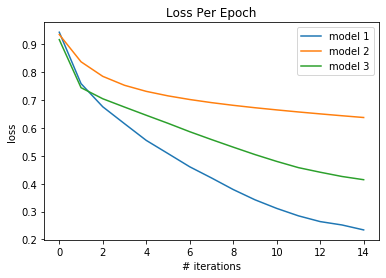

In [143]:
plt.plot(history_1.history['loss'], label="model 1")
plt.plot(history_2.history['loss'], label="model 2")
plt.plot(history_3.history['loss'], label="model 3")
plt.xlabel("# iterations")
plt.ylabel("loss")
plt.legend()
plt.title("Loss Per Epoch")

<h6> Evaluations </h6>

> Below are the evaluations on the validation sets. Below are the loss value & accuracy metric values for the model with the test data. The evaluation scores for model 1 were better than the metrics for the other two values on the test set. 

In [145]:
score1 = structure_1.evaluate(X_test, y_test)
score2 = structure_2.evaluate(X_test, y_test)
score3 = structure_3.evaluate(X_test, y_test)

346/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

346/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

346/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [146]:
score1, score2, score3

([0.26570011098260826, 0.8930636],
 [0.661059229704686, 0.70520234],
 [0.4360750253834476, 0.8323699])

The code snippet below is just to show the softmax probability distributions. Using argmax we can find the index of prediction and see the prediction it makes on the test dataset.

In [66]:
Ytest_probs = structure_1.predict(X_test)
Ytest_preds = np.argmax(Ytest_probs, axis=1)
Ytest_preds

[[5.4134621e-04 9.9945360e-01 4.9569458e-06]
 [9.9999952e-01 4.7662934e-07 2.4680751e-14]
 [9.9961483e-01 3.8516775e-04 2.1907691e-14]
 ...
 [9.9998534e-01 1.4716581e-05 1.0210854e-09]
 [3.1986700e-03 9.8750478e-01 9.2965374e-03]
 [9.9999881e-01 1.1467621e-06 7.9472144e-11]]
346


array([1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0,